## Exemple base 

In [1]:
from astropy.time import Time
import ciboulette.base.ciboulette as Cbl
import ciboulette.base.constent as C

- Class initialisation

In [2]:
cbl = Cbl.Ciboulette()

- Table edition

In [3]:
cbl.table.pprint(max_width = 255)

API        SERVER       DEVICE FOCAL DIAM SITE_LAT SITE_LONG SITE_ELEV  INSTRUME  NAXIS1 NAXIS2 BINXY PIXELXY FILTER     NAME     OBSERVER DATASET     ARCHIVES      RA DEC  OBJECT
---- ------------------ ------ ----- ---- -------- --------- --------- ---------- ------ ------ ----- ------- ------ ------------ -------- ------- ---------------- --- ---- ------
2000 192.168.1.18:11111      0  85.0   60  49.5961    359.65       100 Atik 383L+   3326   2504     1     5.4      L CIBOULETTE-A     CAM1 dataset dataset/archives 0.0 90.0   INIT


- Filter initialisation

In [4]:
cbl.filtername = 'CLS'

- Site initialisation

In [5]:
cbl.site = {"LAT": 49.51,"LONG": 359.65,"ELEV": 105}

- Instrument initialisation, optic and camera

In [6]:
cbl.samyang85_1_4
cbl.atiktitan

- Object, RA and DEC initialisation whit object name of **astroquery.simbad**

In [7]:
cbl.positionsbyname = 'ngc129'

- Editing changes

In [8]:
cbl.table['INSTRUME', 'FOCAL', 'FILTER', 'RA', 'DEC', 'OBJECT'].pprint()

 INSTRUME  FOCAL FILTER  RA        DEC           OBJECT 
---------- ----- ------ --- ------------------ ---------
Atik Titan    85    CLS 0.5 60.218333333333334 NGC   129


- Projection of the observed location and editing of basic informations. The cursor, the Milky Way, open clusters, cepheid star, Herbig Ae/Be and the Moon (grey).

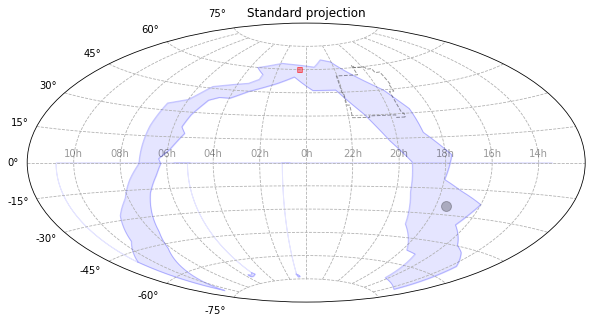

In [9]:
cbl.projections

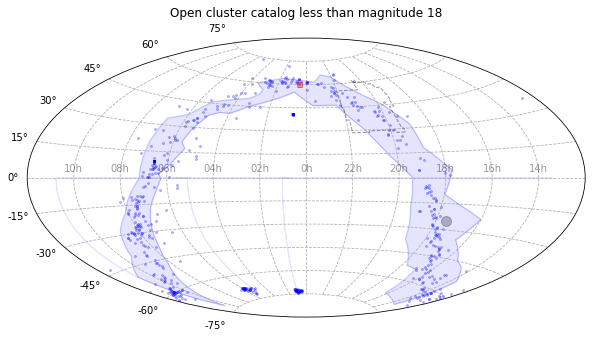

In [10]:
cbl.opencluster

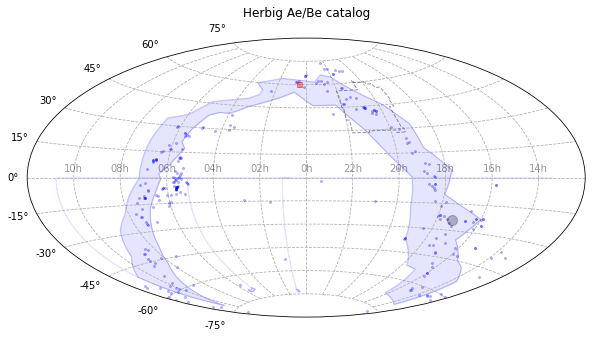

In [12]:
cbl.HerbigAeBe

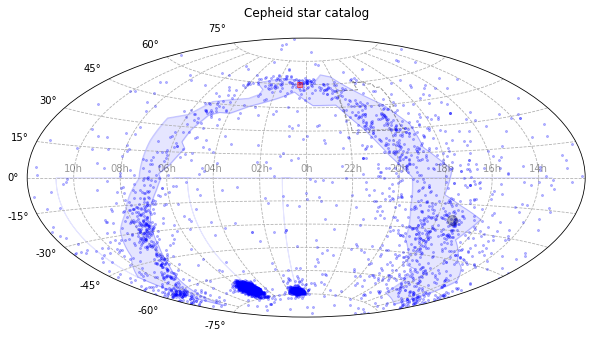

In [13]:
cbl.cepheid

- Stars field create and display. The catalog used is **GAIA-EDR3** with the inquiries on the **CDS - VizieR** website

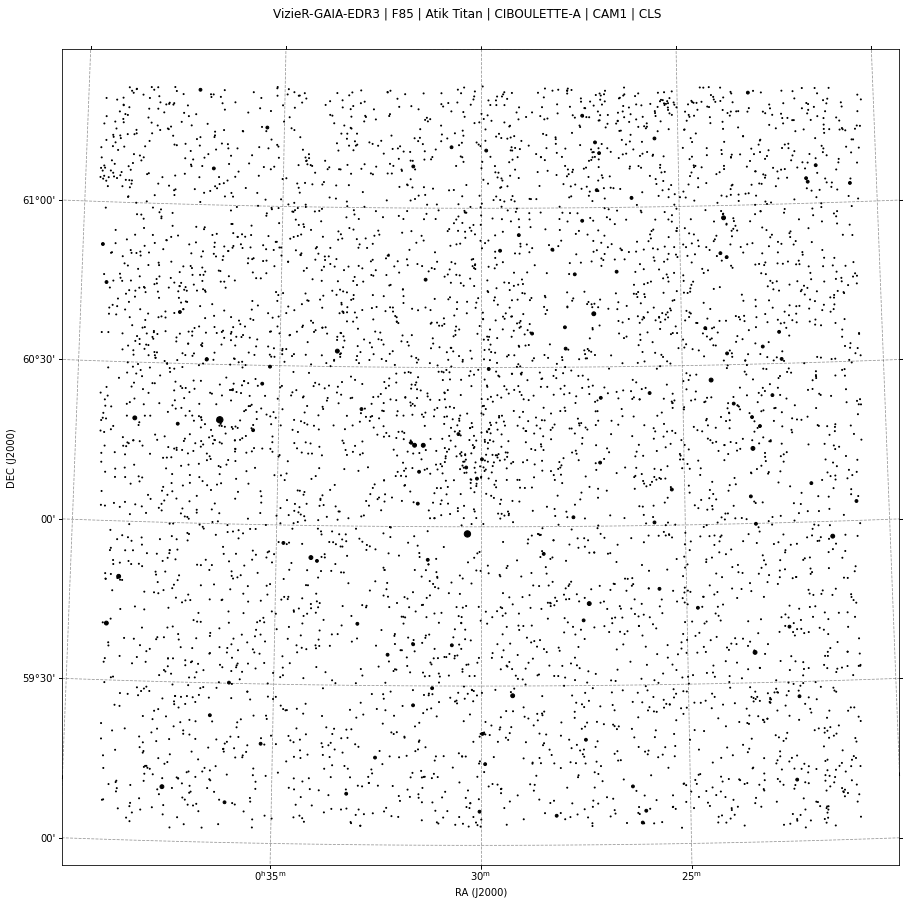

In [9]:
cbl.starsmap

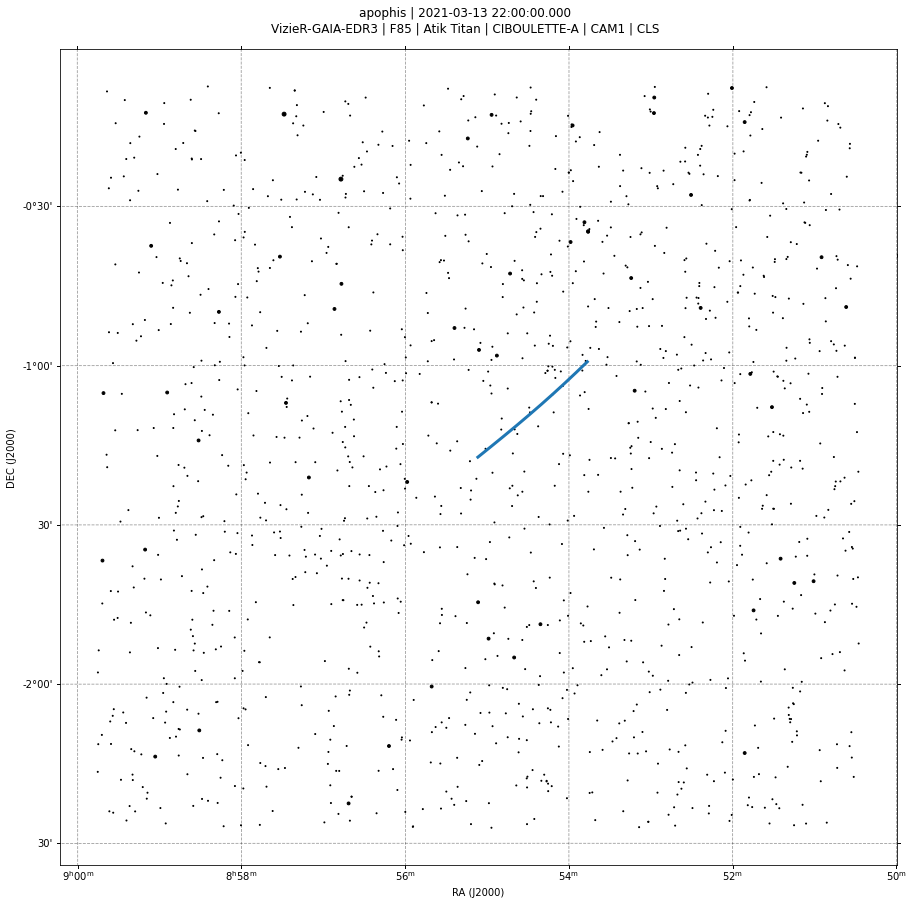

In [10]:
epoch = Time('2021-03-13 22:00:00', format='iso')
cbl.trajectory('apophis',epoch,'1h',10)